# Engine Temperature Monitoring 

## 1.  Load Libraries and dataset

### 1.1 Load important libraries

In [1]:
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier



In [2]:
%matplotlib inline

### 1.2 Load .xlsx file

In [3]:
data = pd.read_csv('machine_temperature_system_failure.csv', sep=',')

In [4]:
data.head()

timestamp      value
0  2013-12-02 21:15:00  73.967322
1  2013-12-02 21:20:00  74.935882
2  2013-12-02 21:25:00  76.124162
3  2013-12-02 21:30:00  78.140707
4  2013-12-02 21:35:00  79.329836

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22695 entries, 0 to 22694
Data columns (total 2 columns):
timestamp    22695 non-null object
value        22695 non-null float64
dtypes: float64(1), object(1)
memory usage: 354.7+ KB


In [6]:
data.describe()

value
count  22695.000000
mean      85.926498
std       13.746912
min        2.084721
25%       83.080078
50%       89.408246
75%       94.016252
max      108.510543

In [7]:
data.shape

(22695, 2)

## 2. Review and Clean the Data

### 2.1 Clean Data

In [8]:
#Check whether there is any missing values

data.isnull().sum()

timestamp    0
value        0
dtype: int64

#No missing data found

In [9]:
#convert to date time

data['timestamp'] =pd.to_datetime(data['timestamp'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22695 entries, 0 to 22694
Data columns (total 2 columns):
timestamp    22695 non-null datetime64[ns]
value        22695 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 354.7 KB


### 2.2 Create Visualizations

Text(0.5, 0, 'Date')

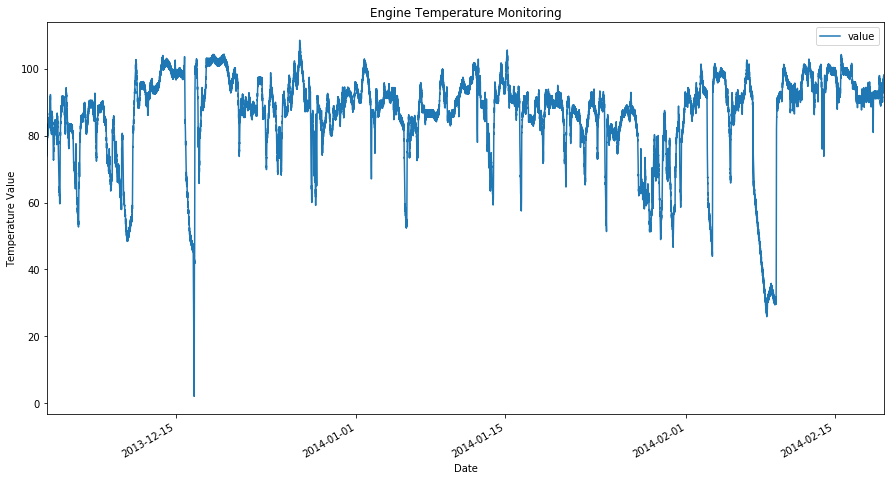

In [10]:
data.plot(x='timestamp', y='value', figsize=(15,8))
plt.title('Engine Temperature Monitoring')
plt.ylabel('Temperature Value')
plt.xlabel('Date')

#### Anomally Detection

In [11]:
#set the constants you need
consistency_const = 1.4826
thresh = 3

In [12]:
#rolling median calculation
data['median_Temp'] = data.value.rolling(480,center=True).median()

In [13]:
#rolling MAD calculation
data['median_Temp_diff'] = abs(data.value-data.median_Temp)
data['median_Temp_mad'] = data.median_Temp_diff.rolling(480,center=True).median()


In [14]:
#rolling modified z-score calculation
data['rolling_z_score'] = pd.to_numeric((data.median_Temp_diff /(data.median_Temp_mad*consistency_const)) > thresh)

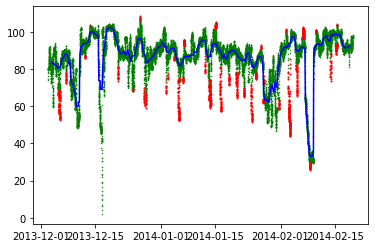

In [15]:
normal = data[data.rolling_z_score == 0]
anomaly = data[data.rolling_z_score == 1]


#normal data as green points
plt.plot_date(normal.timestamp, normal.value, color='green',markersize=0.5)
#anomalies as red points
plt.plot_date(anomaly.timestamp, anomaly.value, color='red',markersize=1)
#rolling median as blue line
plt.plot_date(data['timestamp'],data['median_Temp'], color='blue',linestyle='solid', marker='None')


## 3. Split dataset in train and test subsets

In [16]:
X =  data['timestamp']  # input variables
y = data['value']#  output variable

In [17]:
# create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(18156,) (18156,)
(4539,) (4539,)


In [19]:
print(X_train)

13137   2014-01-17 11:00:00
20397   2014-02-11 16:00:00
15585   2014-01-25 23:00:00
17511   2014-02-01 15:30:00
16845   2014-01-30 08:00:00
13437   2014-01-18 12:00:00
1844    2013-12-09 06:55:00
15583   2014-01-25 22:50:00
13917   2014-01-20 04:00:00
22473   2014-02-18 21:00:00
3108    2013-12-13 16:15:00
17546   2014-02-01 18:25:00
6932    2013-12-26 22:55:00
7920    2013-12-30 09:15:00
4959    2013-12-20 02:30:00
20722   2014-02-12 19:05:00
3887    2013-12-16 09:10:00
1663    2013-12-08 15:50:00
3666    2013-12-15 14:45:00
6002    2013-12-23 17:25:00
10877   2014-01-09 14:40:00
12950   2014-01-16 19:25:00
15859   2014-01-26 21:50:00
13774   2014-01-19 16:05:00
15951   2014-01-27 05:30:00
19836   2014-02-09 17:15:00
17585   2014-02-01 21:40:00
2674    2013-12-12 04:05:00
5684    2013-12-22 14:55:00
20224   2014-02-11 01:35:00
                ...        
10586   2014-01-08 14:25:00
7975    2013-12-30 13:50:00
9023    2014-01-03 05:10:00
20790   2014-02-13 00:45:00
12553   2014-01-15 1

## 4. Prepare the Temperature Data

### 4.1 Feature Selection

One Feature available which is te temperature

## 5. Machine Learning Model Application

In [20]:
import plotly
import plotly.offline
plotly.offline.init_notebook_mode()
import plotly.graph_objects as go

In [21]:
fig = go.Figure()

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
df = data[['value']]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(df)
df = pd.DataFrame(np_scaled)
# train isolation forest
model =  IsolationForest()
model.fit(df) 
data['anomaly2'] = pd.Series(model.predict(df))

data.head()

C:\Users\212693013\.conda\envs\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning:

default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.

C:\Users\212693013\.conda\envs\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning:

behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.

C:\Users\212693013\.conda\envs\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning:

threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.



timestamp      value  median_Temp  median_Temp_diff  \
0 2013-12-02 21:15:00  73.967322          NaN               NaN   
1 2013-12-02 21:20:00  74.935882          NaN               NaN   
2 2013-12-02 21:25:00  76.124162          NaN               NaN   
3 2013-12-02 21:30:00  78.140707          NaN               NaN   
4 2013-12-02 21:35:00  79.329836          NaN               NaN   

   median_Temp_mad  rolling_z_score  anomaly2  
0              NaN            False         1  
1              NaN            False         1  
2              NaN            False         1  
3              NaN            False         1  
4              NaN            False         1

In [23]:
a = data.loc[data['anomaly2'] == -1, ['timestamp', 'value']] #anomaly

In [24]:
fig.add_trace(go.Scatter(x=data['timestamp'], y=data['value'],
                    mode='lines',
                    name='Temparature'))

fig.add_trace(go.Scatter(x=a['timestamp'], y=a['value'],
                    mode='markers',
                    name='Anomalies'))
fig.show()